<a href="https://colab.research.google.com/github/Akash-sahay/Zomato-Hyderabad-Restaurant-Analysis/blob/main/Zomato_Hyderabad_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
name_filepath = '../data/restaurant_metadata.csv'
reviews_filepath = '../data/restaurant_reviews.csv'

In [9]:
name_metadata_df = pd.read_csv(name_filepath)
reviews_df = pd.read_csv(reviews_filepath)

In [10]:
restaurants = name_metadata_df.copy()
reviews = reviews_df.copy()

In [12]:
print(restaurants.shape)
print(reviews.shape)
restaurants.head()

(105, 6)
(10000, 7)


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [13]:
restaurants['Cost'] = restaurants['Cost'].str.replace(",","").astype('int64')

In [14]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.1+ KB


In [16]:
restaurants.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [17]:
reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [19]:
reviews.dropna(inplace = True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [20]:
reviews['Rating'].value_counts()

Rating
5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [21]:
reviews=reviews[reviews['Rating']!='Like']

In [22]:
reviews['Rating'] = reviews['Rating'].astype('float64')
reviews[['Reviews','Followers']]=reviews['Metadata'].str.split(',',expand=True) # Changed this line to correctly split the 'Metadata' column
reviews['Reviews'] = pd.to_numeric(reviews['Reviews'].str.split(' ').str[0])
reviews['Followers'] = pd.to_numeric(reviews['Followers'].str.split(' ').str[1])
reviews['Time']=pd.to_datetime(reviews['Time'])
reviews['Year'] = pd.DatetimeIndex(reviews['Time']).year
reviews['Hour'] = pd.DatetimeIndex(reviews['Time']).hour
reviews = reviews.drop(['Metadata'], axis = 1)
reviews.dtypes

Restaurant            object
Reviewer              object
Review                object
Rating               float64
Time          datetime64[ns]
Pictures               int64
Reviews                int64
Followers            float64
Year                   int32
Hour                   int32
dtype: object

In [23]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,21


In [24]:
cuisine_list = restaurants.Cuisines.str.split(', ') #split the list into names
cuis_list = {} #create an empty list
for names in cuisine_list: # for any names in cuisine_list
    for name in names: # for any name in names
        if (name in cuis_list): #if this name is already present in the cuis_list
            cuis_list[name]+=1 # increase his value
        else:  # else
            cuis_list[name]=1 # Create his index in the list
cuis_df = pd.DataFrame(cuis_list.values(),index = cuis_list.keys(),columns = ['Counts of Restaurants']) #Create a cuis dataframe
cuis_df.sort_values(by = 'Counts of Restaurants',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_cuis = cuis_df[0:10] #Pick the 10 restaurant most nominated
print('The Top 10 Cuisines are:\n',top_10_cuis)

The Top 10 Cuisines are:
               Counts of Restaurants
North Indian                     61
Chinese                          43
Continental                      21
Biryani                          16
Fast Food                        15
Asian                            15
Italian                          14
Desserts                         13
South Indian                      9
Bakery                            7


Text(0.5, 1.0, 'Most popular cuisines at Restaurants in Hyderabad')

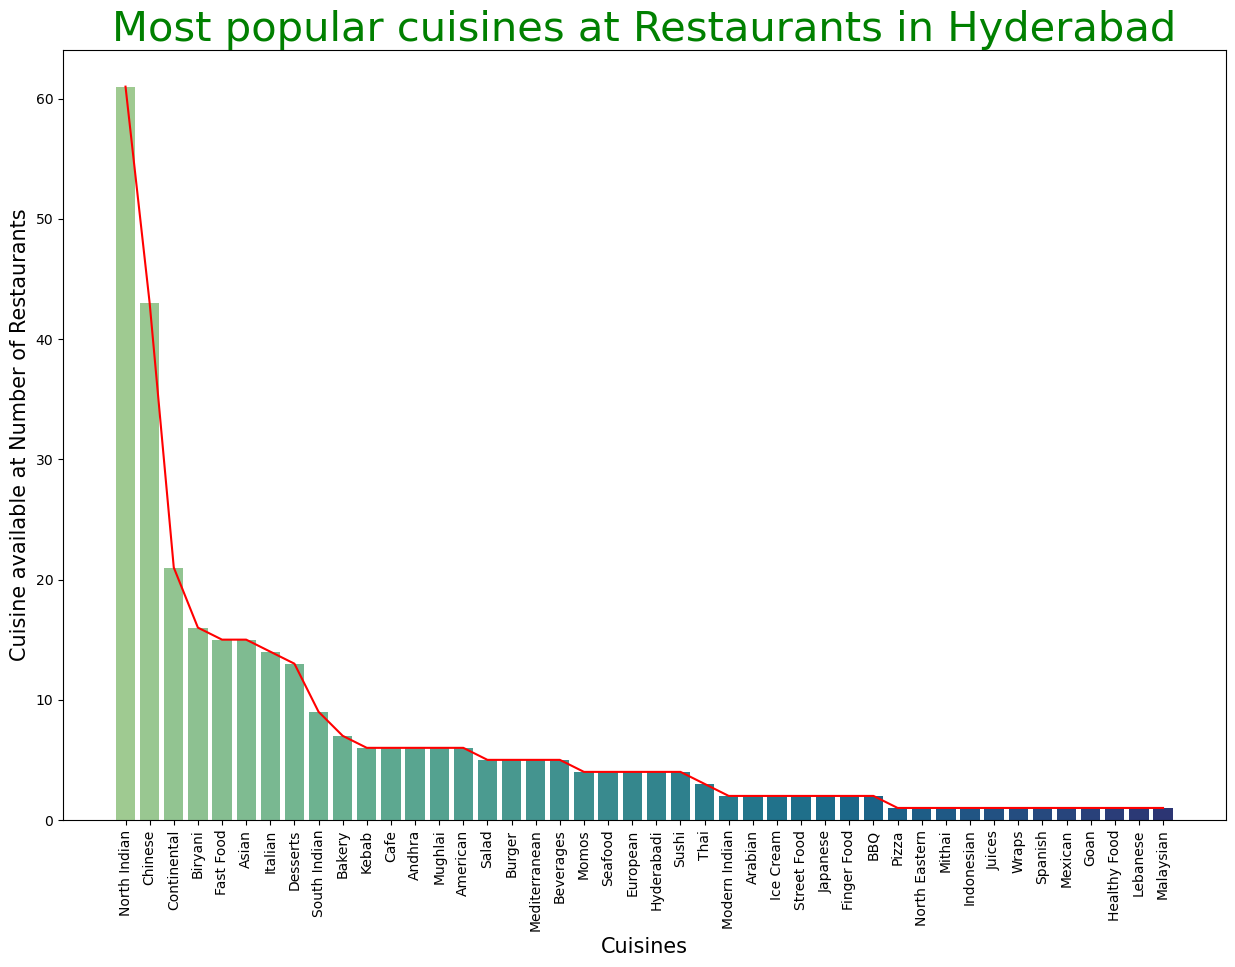

In [25]:
plt.figure(figsize=(15,10))
plt.plot(cuis_df.index,cuis_df['Counts of Restaurants'],color='red')
plt.bar(cuis_df.index,cuis_df['Counts of Restaurants'],color= sns.color_palette("crest",len (cuis_df.index)))
plt.xlabel('Cuisines',size=15)
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants',size=15)
plt.title('Most popular cuisines at Restaurants in Hyderabad',size=30, color = 'green')

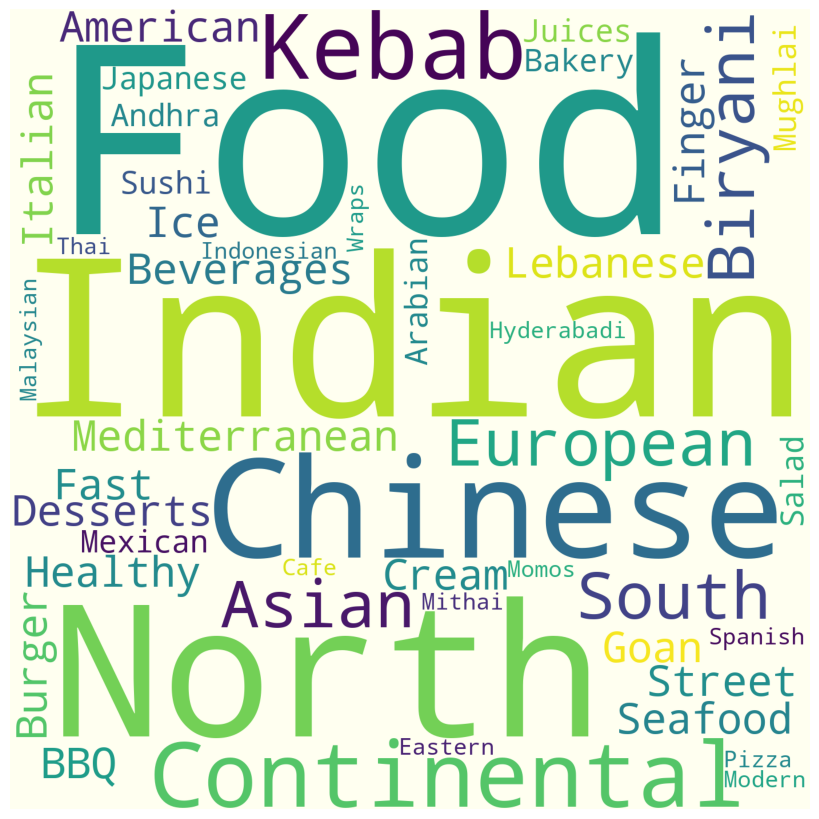

In [31]:
from wordcloud import WordCloud, STOPWORDS
words_list = cuis_list.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '

wordcloud = WordCloud(width = 1400, height = 1400,
                background_color ='ivory',
                min_font_size = 12).generate(strr)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

C:\Users\jyosh\AppData\Local\Temp\ipykernel_14264\3465237496.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  restaurants_cost=restaurants.groupby('Name').apply(lambda x:np.average(x['Cost'])).reset_index(name='Cost')


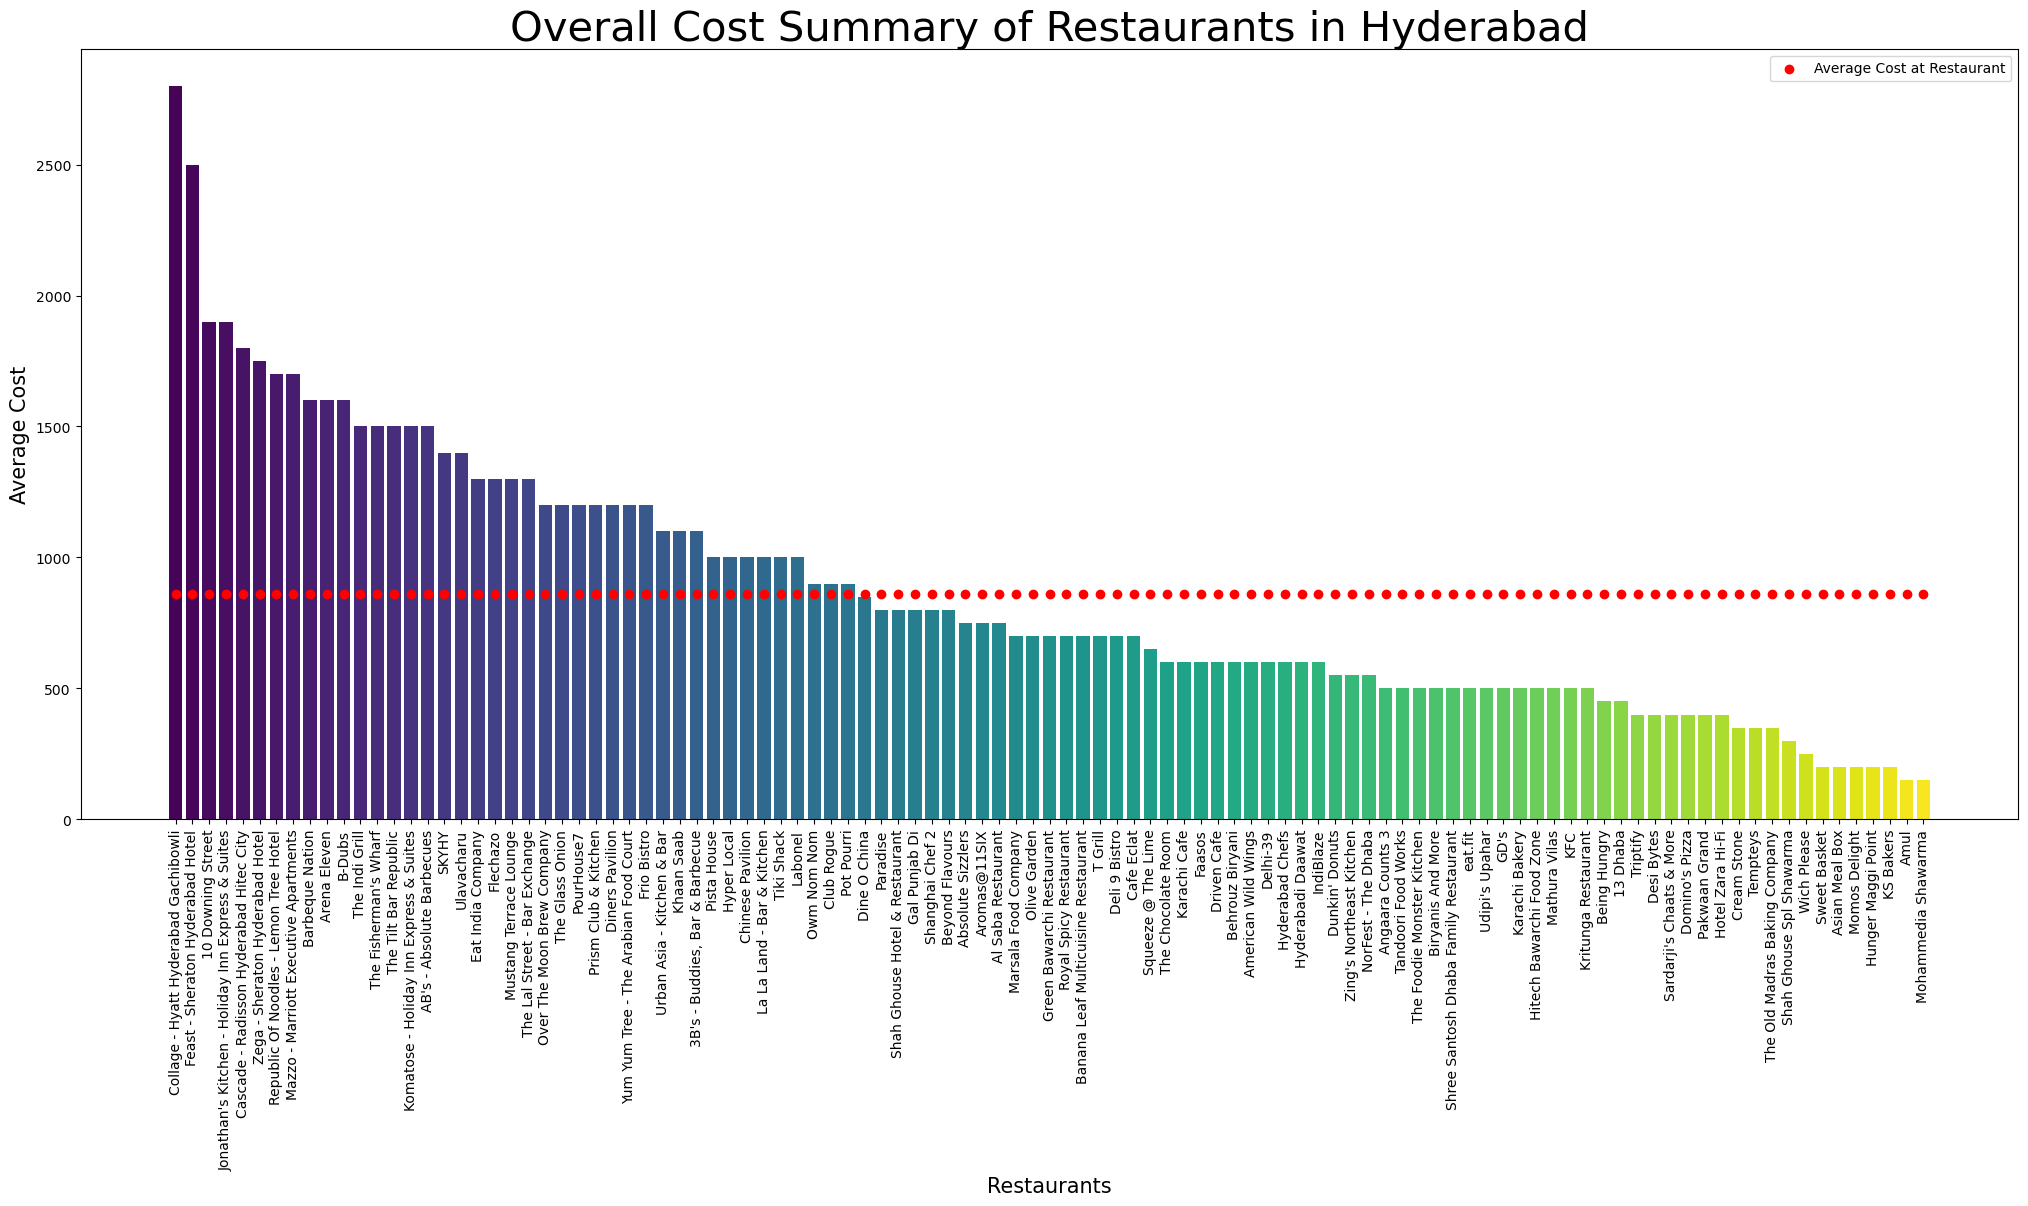

In [32]:
restaurants_cost=restaurants.groupby('Name').apply(lambda x:np.average(x['Cost'])).reset_index(name='Cost')
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
avg=np.average(restaurants_cost['Cost'])
plt.figure(figsize=(25,10))
plt.bar(restaurants_cost['Name'],restaurants_cost['Cost'], color = sns.color_palette("viridis", len(restaurants_cost['Name'])))
for i in restaurants_cost['Name']:
    plt.scatter(i,avg,color='red')
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants in Hyderabad',size=30)
plt.legend(['Average Cost at Restaurant'])

Text(0, 0.5, 'Average Cost')

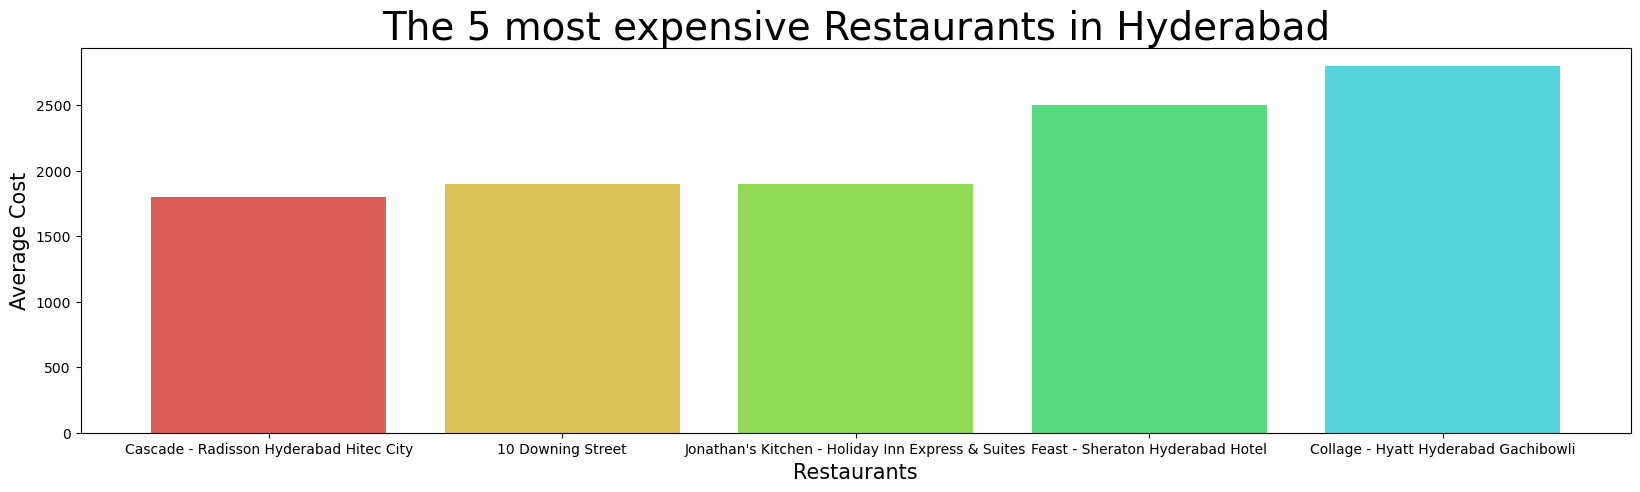

In [34]:
best_5_rest = restaurants_cost[:5].copy()
best_5_rest.sort_values(by='Cost',ascending=True,inplace=True)
plt.figure(figsize=(20,5))
plt.bar(best_5_rest['Name'],best_5_rest['Cost'], color = sns.color_palette("hls", 8))
plt.title('The 5 most expensive Restaurants in Hyderabad',size=28)
plt.xlabel('Restaurants',size=15)
plt.ylabel('Average Cost',size=15)

Text(0, 0.5, 'Average Cost')

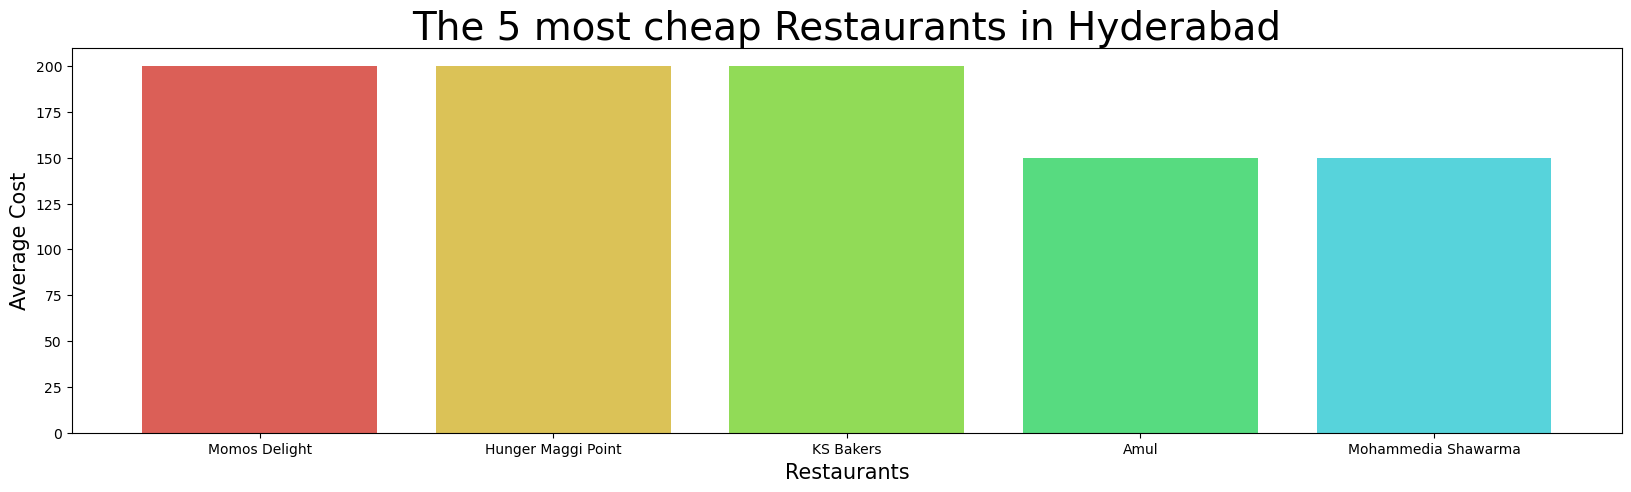

In [35]:
worst_5_rest = restaurants_cost[-5:].copy()
plt.figure(figsize=(20,5))
plt.bar(worst_5_rest['Name'],worst_5_rest['Cost'], color = sns.color_palette("hls", 8))
plt.title('The 5 most cheap Restaurants in Hyderabad',size=28)
plt.xlabel('Restaurants',size=15)
plt.ylabel('Average Cost',size=15)

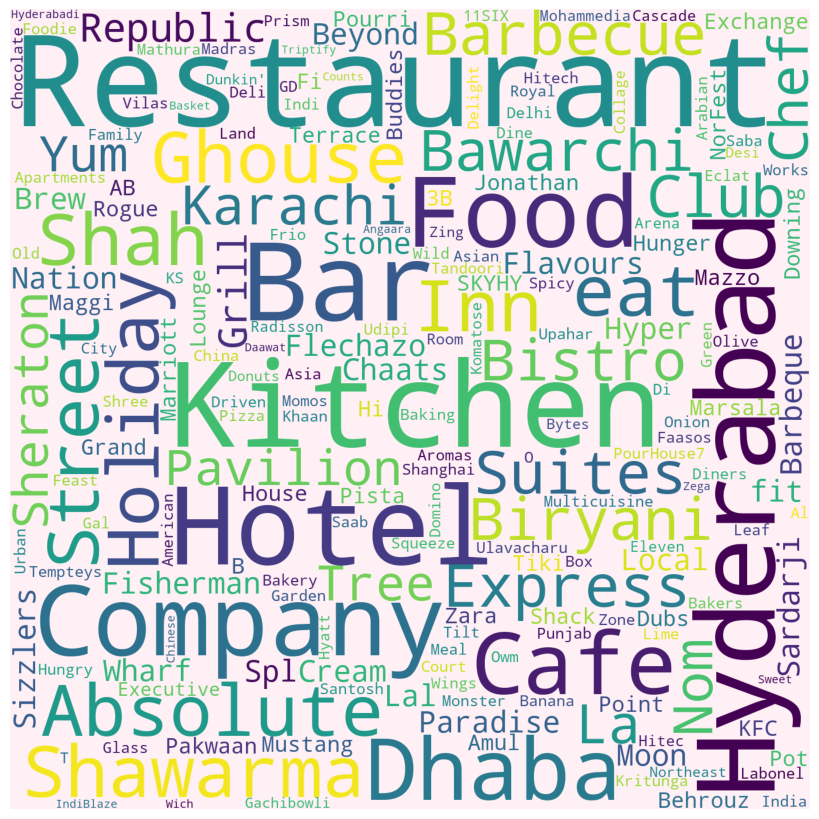

In [36]:
Rests = restaurants.Name.unique()
rest_string = ' '
for i in Rests:
   rest_string = rest_string+i+' '

wordcloud = WordCloud(width = 1400, height = 1400,
                background_color ='lavenderblush',
                min_font_size = 12).generate(rest_string)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [38]:
reviewer_list = reviews.groupby('Reviewer').size().reset_index(name='Review Count')
reviewer_list = reviewer_list.sort_values(by = 'Review Count',ascending=False)
top_reviewers = reviewer_list[:15]

Text(0, 0.5, 'N° of reviews')

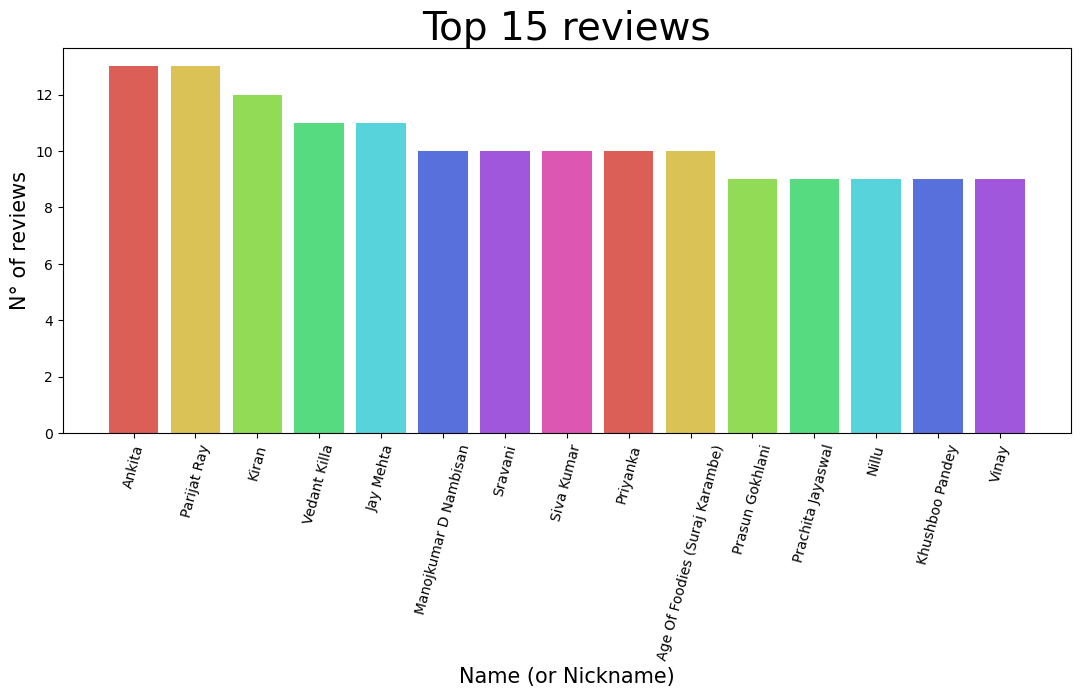

In [39]:
plt.figure(figsize=(13,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review Count'], color = sns.color_palette("hls", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviews',size=28)
plt.xlabel('Name (or Nickname)',size=15)
plt.ylabel('N° of reviews',size=15)

In [41]:
review_ratings=reviews.groupby('Reviewer').size().reset_index(name='Average Ratings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]

In [42]:
top_reviewers_ratings

,Reviewer,Review Count,Average Ratings
0,Ankita,13,13
1,Parijat Ray,13,13
2,Kiran,12,12
3,Vedant Killa,11,11
4,Jay Mehta,11,11
5,Manojkumar D Nambisan,10,10
6,Sravani,10,10
7,Siva Kumar,10,10
8,Priyanka,10,10
9,Age Of Foodies (Suraj Karambe),10,10


Text(0.5, 1.0, 'Average Ratings per Review Submitted Distribution')

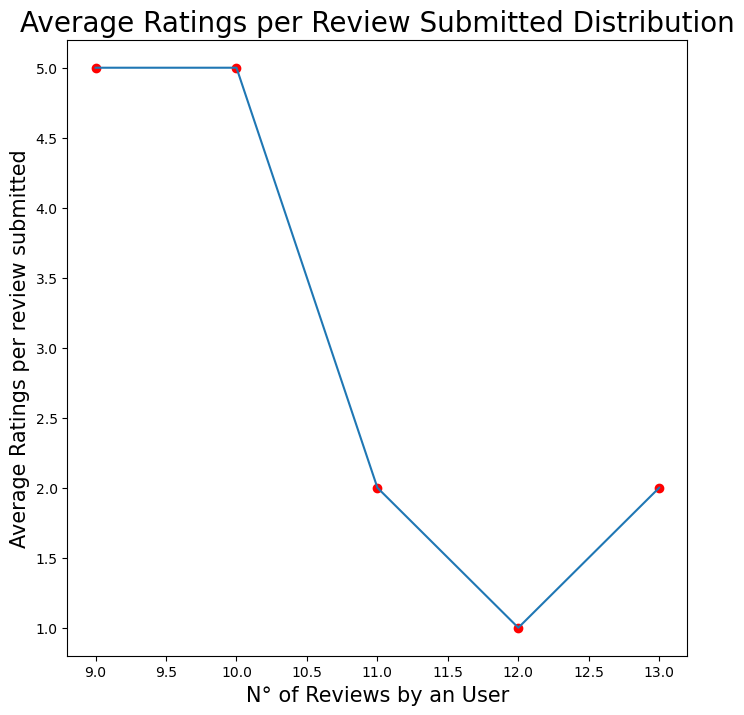

In [44]:
review_ratings_plot = top_reviewers_ratings.groupby('Review Count').size().reset_index(name='Average')
plt.figure(figsize=(8,8))
plt.plot(review_ratings_plot['Review Count'],review_ratings_plot['Average'])
plt.scatter(review_ratings_plot['Review Count'],review_ratings_plot['Average'],color='red')
plt.xlabel('N° of Reviews by an User',size=15)
plt.ylabel('Average Ratings per review submitted',size=15)
plt.title('Average Ratings per Review Submitted Distribution',size=20)

In [47]:
review_follow= reviews.groupby('Year').agg({
    'Reviews':'sum',
    'Followers':'max',
    'Pictures':'sum'
    }).reset_index()

review_follow.columns=['Year','Total Reviews','Total Followers', 'Total Pictures']
review_follow

,Year,Total Reviews,Total Followers,Total Pictures
0,2016,4534,3353.0,84
1,2017,12784,5451.0,276
2,2018,107637,13410.0,2827
3,2019,114020,13410.0,4298


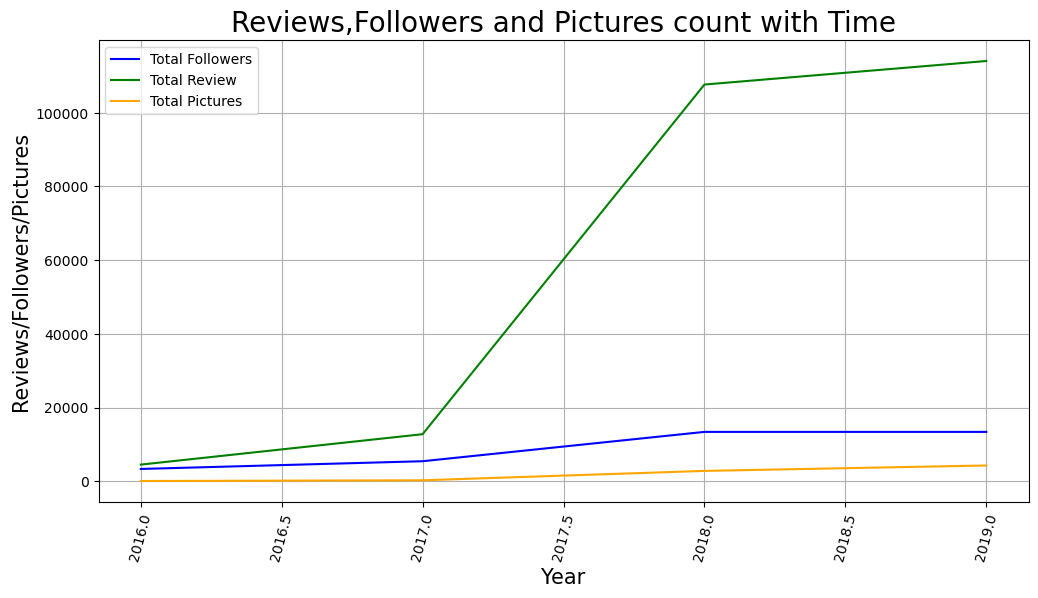

In [48]:
plt.figure(figsize=(12,6))
plt.plot(review_follow['Year'],review_follow['Total Followers'], color = 'blue')
plt.plot(review_follow['Year'],review_follow['Total Reviews'], color = "green")
plt.plot(review_follow['Year'],review_follow['Total Pictures'], color = "orange")
plt.xlabel('Year',size=15)
plt.xticks(rotation=75)
plt.grid()
plt.ylabel('Reviews/Followers/Pictures',size=15)
plt.title('Reviews,Followers and Pictures count with Time',size=20)
plt.legend(['Total Followers','Total Review', 'Total Pictures'])

In [50]:
reviews_for_hour = reviews.groupby('Hour').size().reset_index(name='Reviews per hour')
reviews_for_hour

,Hour,Reviews per hour
0,0,509
1,1,313
2,2,167
3,3,102
4,4,55
5,5,39
6,6,44
7,7,78
8,8,134
9,9,171


Text(0, 0.5, 'N° of reviews')

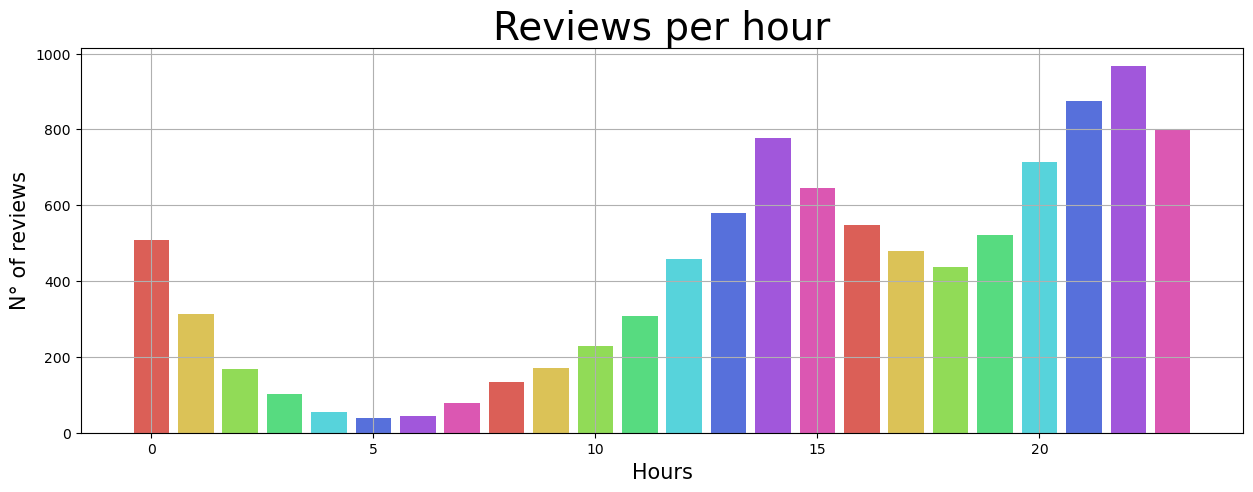

In [51]:
plt.figure(figsize=(15,5))
plt.bar(reviews_for_hour['Hour'], reviews_for_hour['Reviews per hour'], color = sns.color_palette("hls", 8))
plt.title('Reviews per hour',size=28)
plt.grid()
plt.xlabel('Hours',size=15)
plt.ylabel('N° of reviews',size=15)

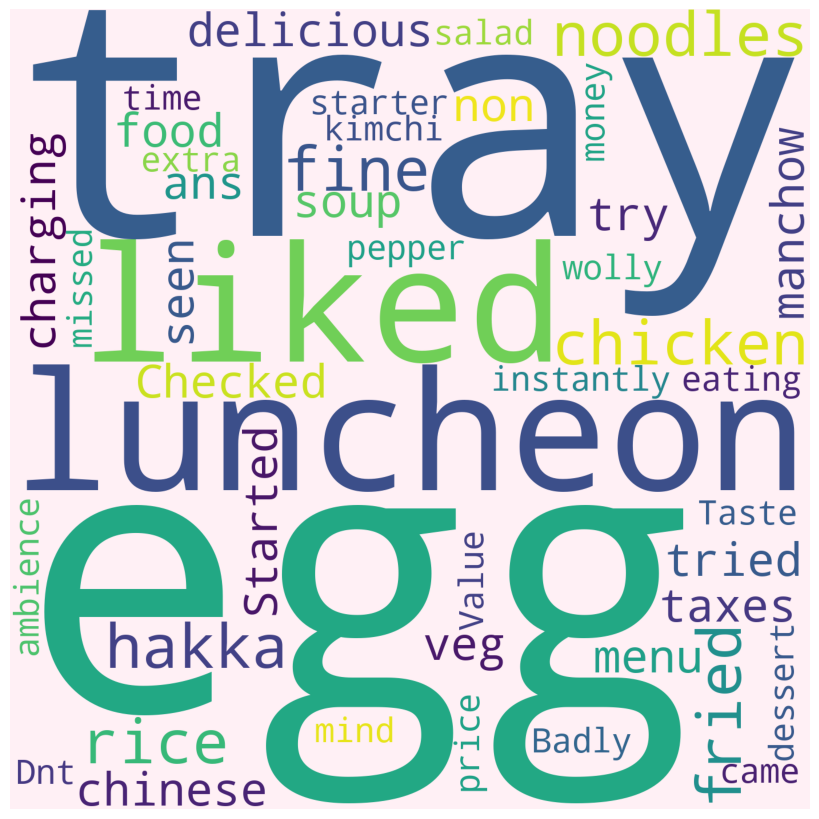

In [56]:
import spacy

# Load the correct English language model
nlp = spacy.load('en_core_web_sm')

reviews_feature = reviews['Review']
for review in reviews_feature:
    doc = nlp(review)
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]
rest_string = ' '
for i in words:
   rest_string = rest_string+i+' '

wordcloud = WordCloud(width = 1400, height = 1400,
                background_color ='lavenderblush',
                min_font_size = 12).generate(rest_string)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [57]:
df_merged= reviews.merge(restaurants, how='inner', left_on='Restaurant', right_on='Name')
df_merged.head(1)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Hour,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


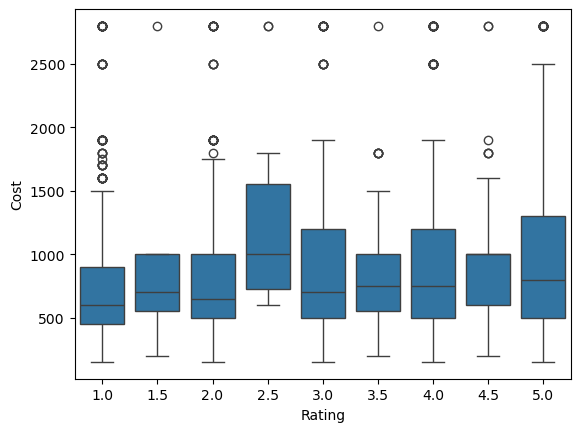

In [58]:
sns.boxplot(x=df_merged.Rating, y=df_merged.Cost) # Use named arguments x and y to specify data for the plot
plt.show()

In [62]:
#Sentiment Analysis Model 

from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import joblib 
import os 

#use reviews daraframe that already exits 
sentiment_df= reviews[['Review','Rating']].copy()
sentiment_df.dropna(inplace=True)

#remove neutral ratings
sentiment_df= sentiment_df[sentiment_df['Rating']!=3.0]

#Create sentiment label 
sentiment_df['sentiment']= sentiment_df['Rating'].apply(lambda x: 1 if x>=4 else 0)

X=sentiment_df['Review']
y= sentiment_df['sentiment']

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state =42)

tfidf_vectorizer= TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1,2)
)

X_train_vec= tfidf_vectorizer.fit_transform(X_train)
X_test_vec= tfidf_vectorizer.transform(X_test)

sentiment_model= LogisticRegression(max_iter=1000)
sentiment_model.fit(X_train_vec,y_train)

accuracy= accuracy_score( y_test, sentiment_model.predict(X_test_vec))
print(f'Accuracy: {accuracy}')



Accuracy: 0.9235596120935539


In [61]:
os.makedirs('../models', exist_ok=True)

joblib.dump(sentiment_model,'../models/sentiment_model.pkl')
joblib.dump(tfidf_vectorizer,'../models/tfidf_vectorizer.pkl')

['../models/tfidf_vectorizer.pkl']